In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

%matplotlib inline

In [2]:
# import Fashion Box Subscription Upgrade

fashion = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/SKP_fashion.csv")

In [3]:
fashion.head() #examine


,age,income,months_subbed,upgrade
0,22,108.99,35,1
1,32,58.63,46,1
2,38,62.89,35,1
3,14,74.39,19,1
4,33,60.11,8,1


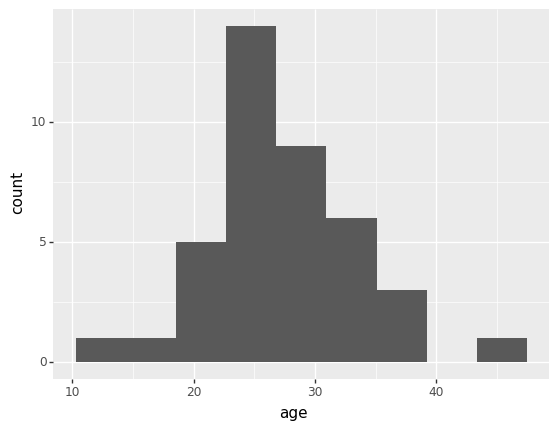

<ggplot: (305209565)>

In [4]:
(ggplot(fashion, aes(x = 'age')) + geom_histogram())


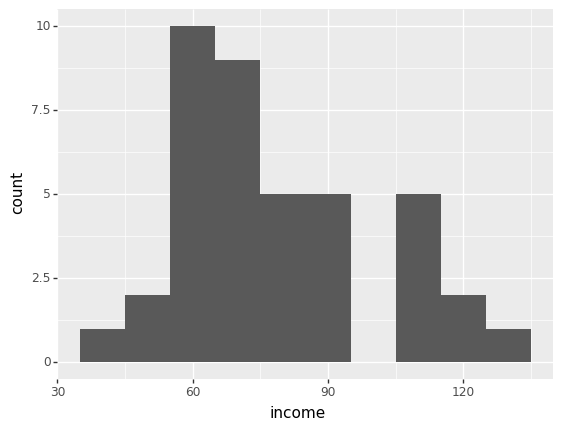

<ggplot: (306266605)>

In [5]:
(ggplot(fashion, aes(x = 'income')) + geom_histogram(binwidth = 10))


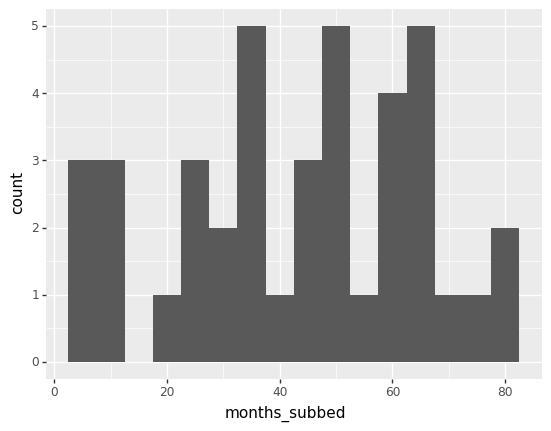

<ggplot: (306292157)>

In [6]:
(ggplot(fashion, aes(x = 'months_subbed')) + geom_histogram(binwidth = 5))


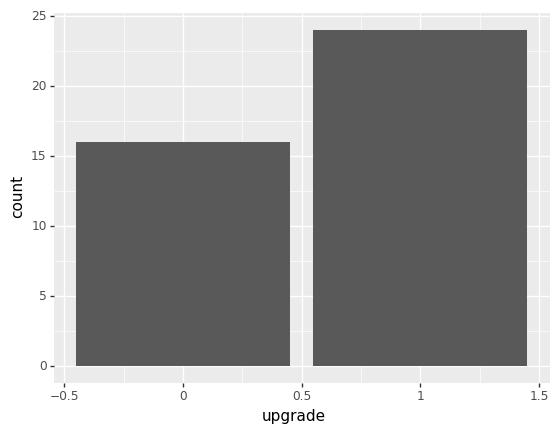

<ggplot: (306292209)>

In [7]:
(ggplot(fashion, aes(x = 'upgrade')) + geom_bar())


In [8]:
Y = fashion["upgrade"]
X = fashion.iloc[:,0:3]
X = sm.add_constant(X)

In [9]:
model = sm.Logit(Y,X)


In [10]:
output = model.fit()


Optimization terminated successfully.
         Current function value: 0.597171
         Iterations 6


In [11]:
output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                upgrade   No. Observations:                   40
Model:                          Logit   Df Residuals:                       36
Method:                           MLE   Df Model:                            3
Date:                Wed, 04 Mar 2020   Pseudo R-squ.:                  0.1127
Time:                        16:49:15   Log-Likelihood:                -23.887
converged:                       True   LL-Null:                       -26.920
Covariance Type:            nonrobust   LLR p-value:                    0.1084
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.9777      2.781     -1.071      0.284      -8.427       2.472
age               0.1445      0.073      1.977      0.048       0.001       0.288
income           -0.0066      0.017     -0.397      0.691      -0.039       0.026
months_subbed     0.0015      0.016      0.089      0.929      -0.030       0.033
=================================================================================
"""

In [12]:
np.exp(output.params)

const            0.050909
age              1.155514
income           0.993470
months_subbed    1.001460
dtype: float64

In [35]:
liz = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Lizzo_data.csv")


In [36]:
liz.head()
liz.columns

Index(['Unnamed: 0', 'artist_name', 'artist_id', 'album_id', 'album_type',
       'album_release_date', 'album_release_year',
       'album_release_date_precision', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'track_id', 'analysis_url',
       'time_signature', 'disc_number', 'duration_ms', 'explicit',
       'track_href', 'is_local', 'track_name', 'track_preview_url',
       'track_number', 'type', 'track_uri', 'external_urls.spotify',
       'album_name', 'key_name', 'mode_name', 'key_mode'],
      dtype='object')

In [42]:
Y = liz["mode"]
colsToKeep = liz.columns.isin(["danceability", "energy", "loudness", "tempo"])
X = liz.loc[ :,colsToKeep]
X = sm.add_constant(X)

In [43]:
model = sm.Logit(Y,X)

In [44]:
ouput = model.fit()

Optimization terminated successfully.
         Current function value: 0.587473
         Iterations 5


In [45]:
ouput.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   mode   No. Observations:                   48
Model:                          Logit   Df Residuals:                       43
Method:                           MLE   Df Model:                            4
Date:                Wed, 04 Mar 2020   Pseudo R-squ.:                 0.07705
Time:                        17:05:57   Log-Likelihood:                -28.199
converged:                       True   LL-Null:                       -30.553
Covariance Type:            nonrobust   LLR p-value:                    0.3186
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2185      3.419      0.064      0.949      -6.482       6.919
danceability    -1.2793      2.668     -0.479      0.632      -6.509       3.951
energy          -0.8886      3.060     -0.290      0.771      -6.886       5.108
loudness         0.1769      0.216      0.819      0.413      -0.247       0.600
tempo            0.0248      0.014      1.803      0.071      -0.002       0.052
================================================================================
"""

In [46]:
np.exp(output.params)

const            0.050909
age              1.155514
income           0.993470
months_subbed    1.001460
dtype: float64